# Coursera Full Data Exploratory Testing

In [28]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from coursera_data_cleaner import clean_coursera_data

spark = SparkSession.builder \
    .master("local") \
    .appName("Coursera") \
    .getOrCreate()

dataFile = "Coursera.csv"
raw_data = spark.read.option('escape','"').csv(dataFile, header=True)

In [29]:
cleaned_data = clean_coursera_data(raw_data)
classified_rows = cleaned_data.filter(cleaned_data['Department'].isNotNull())
print(classified_rows.count())
classified_rows.select('Skills', 'Department', 'Primary Subject').show(99)

40
+--------------------+-----------+---------------+
|              Skills| Department|Primary Subject|
+--------------------+-----------+---------------+
|Data Analysis  se...|Programming|            SQL|
|aggregate functio...|Programming|            SQL|
|Databases  java a...|Programming|            SQL|
|database manageme...|Programming|            SQL|
|SQL  Leadership a...|Programming|            SQL|
|relational databa...|Programming|            SQL|
|relative change a...|Programming|            SQL|
|ascendency  join ...|Programming|            SQL|
|Computer Programm...|Programming|            SQL|
|nested sql  SQL  ...|Programming|            SQL|
|relational databa...|Programming|            SQL|
|documents  Databa...|Programming|            SQL|
|database manageme...|Programming|            SQL|
|Computer Programm...|Programming|            SQL|
|Computer Programm...|Programming|            SQL|
|Databases  web pa...|Programming|            SQL|
|relational databa...|Progra

In [30]:
summary_by_department = cleaned_data.groupBy('Department').count()
print('Count of Courses by Department')
summary_by_department.show(truncate=False)

Count of Courses by Department
+-----------+-----+
|Department |count|
+-----------+-----+
|null       |3491 |
|Programming|40   |
+-----------+-----+



In [31]:
summary_by_primary_subject = cleaned_data.groupBy('Primary Subject').count()
print('Count of Courses by Primary Subject')
summary_by_primary_subject.show(truncate=False)

Count of Courses by Primary Subject
+---------------+-----+
|Primary Subject|count|
+---------------+-----+
|null           |3491 |
|SQL            |40   |
+---------------+-----+



In [32]:
summary_by_department_rows = summary_by_department.collect()

departments = list(map(lambda row: 'n/a' if row[0] is None else row[0], summary_by_department_rows))
course_count_by_department = list(map(lambda row: row[1], summary_by_department_rows))

In [33]:
summary_by_primary_subject_rows = summary_by_primary_subject.collect()

primary_subjects = list(map(lambda row: 'n/a' if row[0] is None else row[0], summary_by_primary_subject_rows))
course_count_by_primary_subject = list(map(lambda row: row[1], summary_by_primary_subject_rows))

Count of Courses by Department


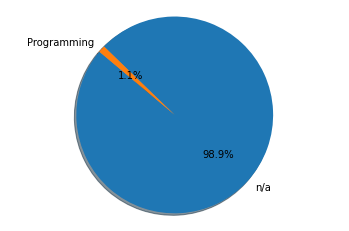

In [34]:
plt.pie(course_count_by_department, labels=departments, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
print('Count of Courses by Department')
plt.show()

Count of Courses by Primary Subject


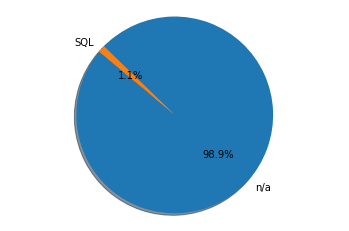

In [35]:
plt.pie(course_count_by_primary_subject, labels=primary_subjects, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
print('Count of Courses by Primary Subject')
plt.show()